
# Project: No-show appointment


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 
Questions:
1. Is there any relationship between age and show appointments?
2. Is there association between show appointments and gender?
3. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
df=pd.read_csv("noshowappointments-kagglev2-may-2016 (2).csv")


PatientId: Patient ID
AppointmentID:Apponintment ID
Gender: Gender(female or male)
ScheduledDay:day the patients set up their appointment
AppointmentDay:date and time of the appointment
Age: Patient age
Neighbourhood:location of the hospital
Scholarship:whether or not the patient is enrolled in Brasilian welfare program
Hipertension:whether patients have Hipertension (1 or 0)
Diabetes: Whether patients have diabetes (1 or o)
Alcoholism:whether patients have alcoholism (1 or 0)
Handcap: number of handicaps that patients have (0,1,2,3,or 4)
SMS_received:patients received a SMS message
No-show:it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


Show up is the dependent variable, and gender, age, Scholarship, Hypertension,Diabetes, etc. are independent variables.

<a id='wrangling'></a>
## Data Wrangling

In [39]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [40]:
sum(df.duplicated())

0

In [41]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no duplicated and missing values. 

In [42]:
df.drop(['PatientId','AppointmentID'],axis=1, inplace=True)

In [43]:
df.shape

(110527, 12)

In [44]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [45]:
df_dropage= df[df['Age']==-1].index

In [46]:
df.drop(df_dropage, inplace=True)

In [47]:
df.shape

(110526, 12)

I dropped the patient who is age is -1. 

In [48]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [49]:
df.rename(columns={'No-show':'show'},inplace=True)

In [50]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [51]:
df['show'].replace({"Yes":0,"No":1},inplace=True)

In [52]:
df['show'].unique()

array([1, 0])

In [21]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
show               int64
dtype: object

In [54]:
df_showed= df.show==True
df_noshowed=df.show==False

In [56]:
df.Age[df_showed].mean()

37.790504154999034

In [57]:
df.Age[df_noshowed].mean()

34.317666562121957

In [24]:
df_showed

0          True
1          True
2          True
3          True
4          True
5          True
6         False
7         False
8          True
9          True
10         True
11        False
12         True
13         True
14         True
15         True
16         True
17        False
18         True
19         True
20        False
21        False
22        False
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
110497     True
110498     True
110499     True
110500     True
110501     True
110502     True
110503     True
110504     True
110505     True
110506     True
110507     True
110508     True
110509     True
110510     True
110511     True
110512     True
110513     True
110514     True
110515    False
110516    False
110517     True
110518     True
110519     True
110520     True
110521     True
110522     True
110523     True
110524     True
110525     True
110526     True
Name: show, Length: 1105

In [58]:
df['show']=df.show.astype(int)

In [59]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
show               int64
dtype: object


### Data Cleaning (Duplicated and Missing data)


I dropped the row that has a patient who is age is -1. There is no duplicated row and missing values in this data.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:Is there any relationship between age and show appointments?

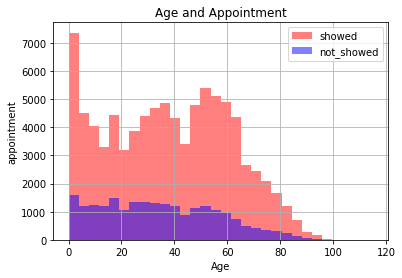

In [61]:
df.Age[df_showed].hist(alpha=0.5, bins=30, label='showed', color="red");
df.Age[df_noshowed].hist(alpha=0.5, bins=30, label='not_showed', color="blue");
plt.xlabel("Age")
plt.ylabel("appointment")
plt.title("Age and Appointment")
plt.legend();

Patients who are age is 0 show up is higher than the other patients. 

### Research Question 2:Is there association between show appointments and gender?

In [62]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [63]:
df[df['show']==1].groupby(['Gender','show']).size().reset_index(name="count")

,Gender,show,count
0,F,1,57245
1,M,1,30962


In [64]:
df[df['show']==0].groupby(['Gender','show']).size().reset_index(name="count")

,Gender,show,count
0,F,0,14594
1,M,0,7725


In [66]:
df[df['show']==0].groupby('Gender').mean()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
Gender,,,,,,,,
F,36.16219,0.144306,0.182061,0.069686,0.021105,0.018569,0.460463,0.0
M,30.83301,0.061100,0.144337,0.053463,0.047767,0.023560,0.396634,0.0


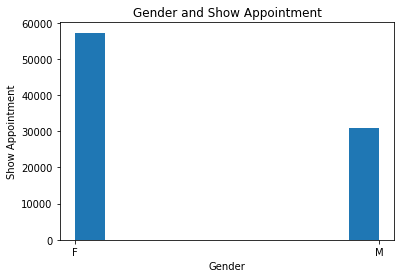

In [67]:
plt.hist(df.Gender[df.show==1]);
plt.xlabel("Gender");
plt.ylabel('Show Appointment')
plt.title('Gender and Show Appointment');




In [68]:
df.Gender[df_showed].value_counts()['M']/df['Gender'].value_counts()['M']

0.80032052110528085

In [69]:
df.Gender[df_showed].value_counts()['F']/df['Gender'].value_counts()['F']

0.79685129247344755

Using the mean and value count graph are difficult to understand the male and female show appointment. When male and female show rates were examined, the male show rate was slightly higher than the female show rate. Therefore, men showed in their appointments is higher than female showed in their appointments.  

### ### Research Question 3:What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

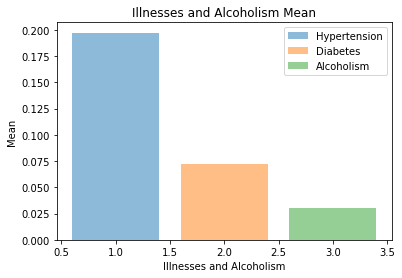

In [70]:
plt.bar(1,df['Hipertension'].mean(),alpha=0.5,label = 'Hypertension');
plt.bar(2,df['Diabetes'].mean(),alpha=0.5,label = 'Diabetes');
plt.bar(3,df['Alcoholism'].mean(),alpha=0.5,label = 'Alcoholism');
plt.ylabel("Mean");
plt.xlabel("Illnesses and Alcoholism")
plt.title("Illnesses and Alcoholism Mean");
plt.legend();

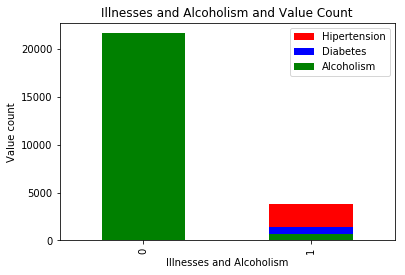

In [49]:
df.Hipertension[df_noshowed].value_counts().plot(kind='bar', color='red');
df.Diabetes[df_noshowed].value_counts().plot(kind='bar', color='blue');
df.Alcoholism[df_noshowed].value_counts().plot(kind='bar', color='green');
plt.xlabel("Illnesses and Alcoholism");
plt.ylabel("Value count");
plt.legend()
plt.title("Illnesses and Alcoholism and Value Count");

In [71]:
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

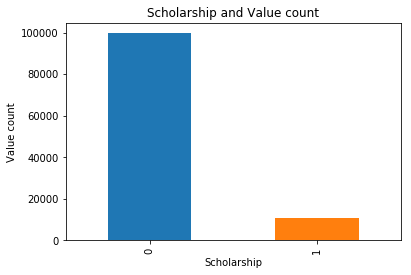

In [72]:
df['Scholarship'].value_counts().plot(kind='bar');
plt.xlabel("Scholarship");
plt.ylabel("Value count");
plt.title("Scholarship and Value count");

Text(0.5,1,'No-show and Scholarship')

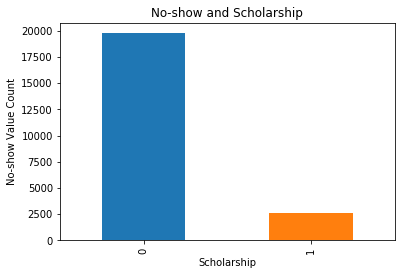

In [55]:
df.Scholarship[df_noshowed].value_counts().plot(kind='bar');
plt.xlabel("Scholarship");
plt.ylabel("No-show Value Count");
plt.title("No-show and Scholarship")

In [73]:
df.Scholarship[df_noshowed].value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

In [74]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [75]:
df.groupby('Scholarship').mean()[['Hipertension','Diabetes','Alcoholism','Handcap']]

,Hipertension,Diabetes,Alcoholism,Handcap
Scholarship,,,,
0,0.199839,0.073988,0.028415,0.022706
1,0.173465,0.052389,0.048614,0.018046


In [76]:
df.groupby('Gender').mean()[['Hipertension','Diabetes','Alcoholism','Handcap']]

,Hipertension,Diabetes,Alcoholism,Handcap
Gender,,,,
F,0.213519,0.078036,0.017024,0.019544
M,0.167033,0.060408,0.055238,0.027270


In [126]:
df.groupby(['Gender','Scholarship','show']).mean()[['Hipertension','Diabetes','Alcoholism','Handcap']]

Hipertension  Diabetes  Alcoholism   Handcap
Gender Scholarship show                                              
F      0           0         0.185218  0.072389    0.014254  0.019779
                   1         0.224167  0.082875    0.012040  0.020100
       1           0         0.163343  0.053656    0.061728  0.011396
                   1         0.201867  0.059878    0.045502  0.017489
M      0           0         0.149869  0.055563    0.048256  0.024404
                   1         0.176613  0.063957    0.057636  0.028002
       1           0         0.059322  0.021186    0.040254  0.010593
                   1         0.097656  0.027344    0.046875  0.031901

In [77]:
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
Hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428
show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000


In [78]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [79]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [80]:
df['Year_appoint'] = df['AppointmentDay'].dt.year
df['Month_appoint'] = df['AppointmentDay'].dt.month

In [81]:
df['Year_sched'] = df['ScheduledDay'].dt.year
df['Month_sched'] = df['ScheduledDay'].dt.month

In [82]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,Year_appoint,Month_appoint,Year_sched,Month_sched
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016,4,2016,4
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016,4,2016,4
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016,4,2016,4
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016,4,2016,4
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016,4,2016,4


In [83]:
df.drop(['ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [84]:
df.head(0)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,Year_appoint,Month_appoint,Year_sched,Month_sched


In [85]:
df['Year_appoint'].nunique()

1

In [86]:
df['Month_appoint'].nunique()

3

In [87]:
df['Year_sched'].nunique()

2

In [88]:
df['Month_sched'].nunique()

8

In [119]:
df.drop(['Year_appoint'],axis=1,inplace= True)

In [120]:
df.head(0)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show,Month_appoint,Year_sched,Month_sched


In [121]:
df.groupby(['Month_appoint','Year_sched']).mean()[['show','Hipertension','Diabetes','Handcap','Alcoholism']]

show  Hipertension  Diabetes   Handcap  \
Month_appoint Year_sched                                               
4             2016        0.804328      0.190726  0.074498  0.022875   
5             2015        0.702703      0.756757  0.000000  0.081081   
              2016        0.792176      0.196537  0.071061  0.022326   
6             2015        0.680000      0.840000  0.360000  0.040000   
              2016        0.815553      0.198827  0.073832  0.021835   

                          Alcoholism  
Month_appoint Year_sched              
4             2016          0.031839  
5             2015          0.000000  
              2016          0.029862  
6             2015          0.000000  
              2016          0.031939

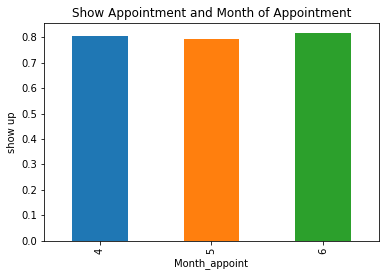

In [111]:
df.groupby('Month_appoint').mean()['show'].plot(kind='bar');
plt.xlabel('Month_appoint');
plt.ylabel('show up');
plt.title('Show Appointment and Month of Appointment');


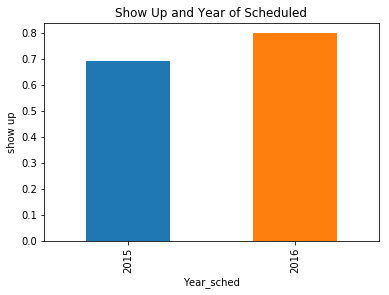

In [113]:
df.groupby('Year_sched').mean()['show'].plot(kind='bar');
plt.xlabel('Year_sched');
plt.ylabel('show up');
plt.title('Show Up and Year of Scheduled');

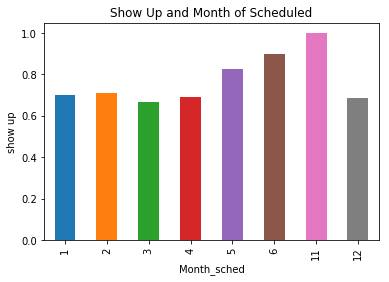

In [118]:
df.groupby('Month_sched').mean()['show'].plot(kind='bar');
plt.xlabel('Month_sched');
plt.ylabel('show up');
plt.title('Show Up and Month of Scheduled');

The patients' show-appointment rate is high in 2016 than in 2015. If the patients schedule an appointment in November, their show appointment rate is higher than in other months. It is not easy to detect the month of appointments and show up. The lowest showed up the patients' appointments is in June 2015, but patients who suffer from hypertension and diabetes mostly showed up their appointments in June 2015.

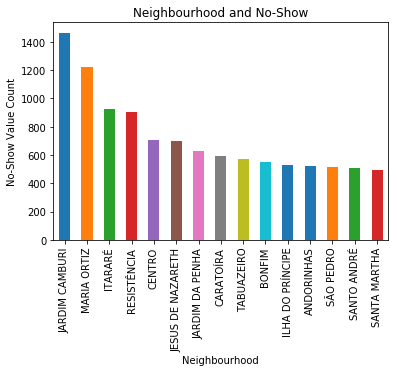

In [60]:
df.Neighbourhood[df_noshowed].value_counts()[0:15].plot(kind='bar');
plt.xlabel("Neighbourhood");
plt.ylabel("No-Show Value Count");
plt.title("Neighbourhood and No-Show");

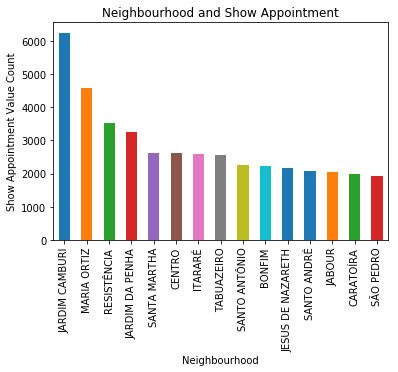

In [61]:
df.Neighbourhood[df_showed].value_counts()[0:15].plot(kind="bar");
plt.xlabel("Neighbourhood");
plt.ylabel("Show Appointment Value Count");
plt.title("Neighbourhood and Show Appointment");

In [94]:
df.Neighbourhood[df_showed].value_counts()[0:15]/df['Neighbourhood'].value_counts()[0:15]

BONFIM               0.801659
CARATOÍRA            0.769591
CENTRO               0.789142
ITARARÉ              0.737336
JABOUR               0.820247
JARDIM CAMBURI       0.810159
JARDIM DA PENHA      0.837245
JESUS DE NAZARETH    0.756046
MARIA ORTIZ          0.790009
RESISTÊNCIA          0.795531
SANTA MARTHA         0.841584
SANTO ANDRÉ          0.802412
SANTO ANTÔNIO        0.823744
SÃO PEDRO            0.789624
TABUAZEIRO           0.817050
Name: Neighbourhood, dtype: float64

In [112]:
df.Neighbourhood[df_showed].value_counts()/df['Neighbourhood'].value_counts()

AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
BELA VISTA             0.798637
BENTO FERREIRA         0.775058
BOA VISTA              0.814103
BONFIM                 0.801659
CARATOÍRA              0.769591
CENTRO                 0.789142
COMDUSA                0.819355
CONQUISTA              0.811543
CONSOLAÇÃO             0.827762
CRUZAMENTO             0.782546
DA PENHA               0.806495
DE LOURDES             0.845902
DO CABRAL              0.842857
DO MOSCOSO             0.777240
DO QUADRO              0.835100
ENSEADA DO SUÁ         0.778723
ESTRELINHA             0.802974
FONTE GRANDE           0.781525
FORTE SÃO JOÃO         0.816834
FRADINHOS              0.813953
GOIABEIRAS             0.804286
GRANDE VITÓRIA         0.797386
GURIGICA               0.774034
HORTO                  0.760000
ILHA DAS CAIEIRAS      0.780579
                         ...   
PARQUE I

Conclusions:
RQ1.Younger patients showed more than older patients in their appointments.
RQ2.Male showed rate is higher than the female show appointment rate(M=0.80032052110528085; F=0.79685129247344755)
RQ3. a)The number of patients who suffer hypertension is higher than diabetes and alcoholism.
     b) There is no relationship between patients' appointment days and showing up because all patients' appointment days are the same.
     c)There is no relationship between patients' scheduled days and showing up because their scheduled days are the same.
     d)AEROPORTO is the neighborhood that patients showed up rate is higher than the other neighborhood. 
     e) Patients who suffer hypertension enrolled the Brasilian welfare program are higher than the patients who suffer from diabetes, alcoholism, and handicaps.
     f)Female patients who suffer from hypertension are more elevated than male patients who suffer from hypertension. 
     g)Females who suffer hypertension and not enrolled the Brasilian welfare program are higher than the females who suffer hypertension and enrolled the welfare program. 
     h)Females, who suffer hypertension and not enrolled the Brasilian walfere program, showing up rate is higher than the other patients. 
     g)There is a positive modarate correleation between hypertension and Diabetes (r= 0.43) and age and hypertension (r=0.05)
     k)The lowest showed up the patients' appointments is in June 2015, but patients who suffer from hypertension and diabetes mostly showed up their appointments in June 2015.
     l)The patients' show-appointment rate is high in 2016 than in 2015.
     
Limitation:
1. There are many Neighbourhood variations, so only 15 of them showed in the graph. 
2. It isn't easy to detect a correlation between variables because of categorical data. 

In [123]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0